<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [87]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["patch.force_edgecolor"] = True
plt.rcParams['figure.figsize']=(30,30)
sns.set_style("whitegrid")

#sns.set_style("whitegrid") part of the update to matplotlib 2.0 the edges on bar plots are turned off by default. However, you may use the rcParam


#As part of the update to matplotlib 2.0 the edges on bar plots are turned off by default. However, you may use the rcParam

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [88]:
def convert(string):
    try:
        string = float(string)
    except:
        string = string
    return string

In [89]:
fole = 'sat_scores.csv'
satdict = {'Math':[],'Verbal':[],'Rate':[],'State':[]}
lost = ['Math','Verbal','Rate','State']
with open(fole, mode='r') as f:
    reader = csv.DictReader(f, delimiter=',')
    for row in reader:
        for i in lost:
            satdict[i].append(convert(row[i]))
        

In [90]:
print satdict

{'Rate': [82.0, 81.0, 79.0, 77.0, 72.0, 71.0, 71.0, 69.0, 69.0, 68.0, 67.0, 65.0, 65.0, 63.0, 60.0, 57.0, 56.0, 55.0, 54.0, 53.0, 53.0, 52.0, 51.0, 51.0, 34.0, 33.0, 31.0, 26.0, 23.0, 18.0, 17.0, 13.0, 13.0, 12.0, 12.0, 11.0, 11.0, 9.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 5.0, 5.0, 4.0, 4.0, 4.0, 45.0], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Verbal': [509.0, 499.0, 511.0, 495.0, 520.0, 501.0, 500.0, 511.0, 506.0, 510.0, 501.0, 508.0, 493.0, 491.0, 499.0, 486.0, 482.0, 526.0, 498.0, 527.0, 493.0, 485.0, 514.0, 498.0, 523.0, 509.0, 539.0, 534.0, 539.0, 527.0, 543.0, 562.0, 551.0, 576.0, 550.0, 547.0, 561.0, 580.0, 577.0, 559.0, 562.0, 567.0, 577.0, 564.0, 584.0, 562.0, 575.0, 593.0, 577.0, 592.0, 566.0,

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [91]:
satfile = pd.read_csv(fole)

In [92]:
satfile.head()

State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516

In [93]:
satfile.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [94]:
sat_df = pd.DataFrame({'State':satdict['State'],'Rate':satdict['Rate'],'Verbal':satdict['Verbal'],'Math':satdict['Math']})

In [95]:
sat_df.head()

Math  Rate State  Verbal
0  510.0  82.0    CT   509.0
1  513.0  81.0    NJ   499.0
2  515.0  79.0    MA   511.0
3  505.0  77.0    NY   495.0
4  516.0  72.0    NH   520.0

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [96]:
sat_df.head(10)

Math  Rate State  Verbal
0  510.0  82.0    CT   509.0
1  513.0  81.0    NJ   499.0
2  515.0  79.0    MA   511.0
3  505.0  77.0    NY   495.0
4  516.0  72.0    NH   520.0
5  499.0  71.0    RI   501.0
6  499.0  71.0    PA   500.0
7  506.0  69.0    VT   511.0
8  500.0  69.0    ME   506.0
9  501.0  68.0    VA   510.0

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [97]:
desc = {'Math' : 'The Average Math score for the state', 'Verbal': 'The average Verbal score', 
        'Rate':'The percentage of students that took the test','State':'The name of the states involved'}
titlelist = ['Math','Verbal','Rate','State']
datadict = {}
for i in titlelist:
    datadict[i]={'Type': satfile[i].dtypes , 'Description' : desc[i]}
datadict['Shape'] = satfile.shape
print datadict

{'Shape': (52, 4), 'Rate': {'Type': dtype('int64'), 'Description': 'The percentage of students that took the test'}, 'State': {'Type': dtype('O'), 'Description': 'The name of the states involved'}, 'Verbal': {'Type': dtype('int64'), 'Description': 'The average Verbal score'}, 'Math': {'Type': dtype('int64'), 'Description': 'The Average Math score for the state'}}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

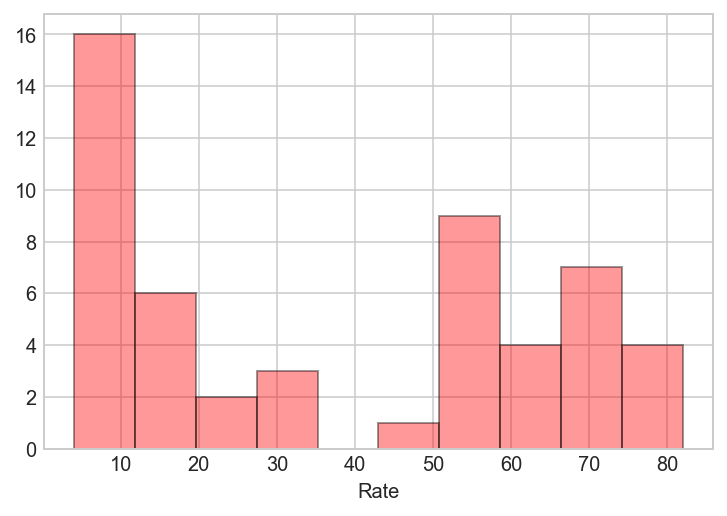

In [98]:
sns.distplot(satfile['Rate'],bins = 10, kde = False, color = 'r')

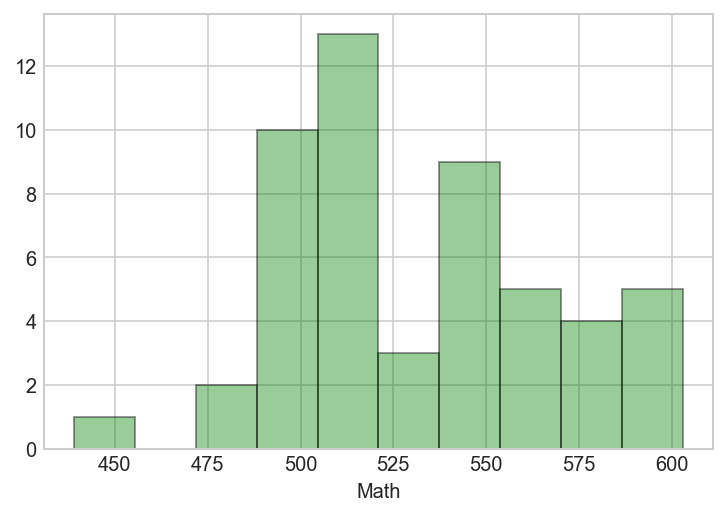

In [99]:
sns.distplot(satfile['Math'],bins = 10, kde = False, color = 'g')

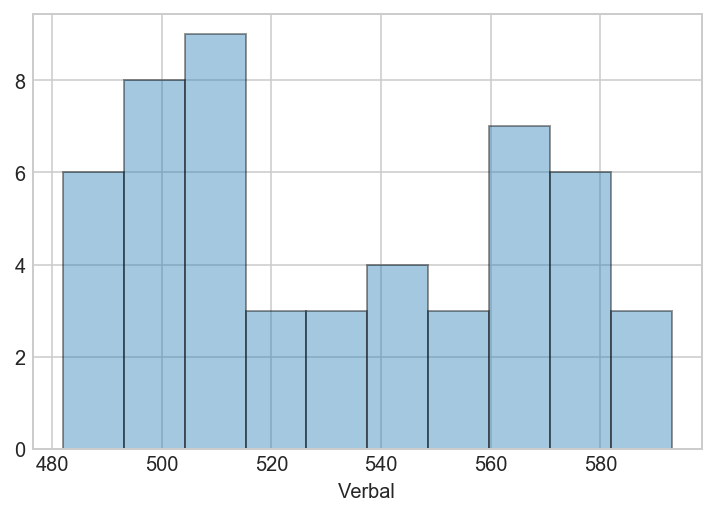

In [100]:
sns.distplot(satfile['Verbal'],bins = 10, kde = False)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

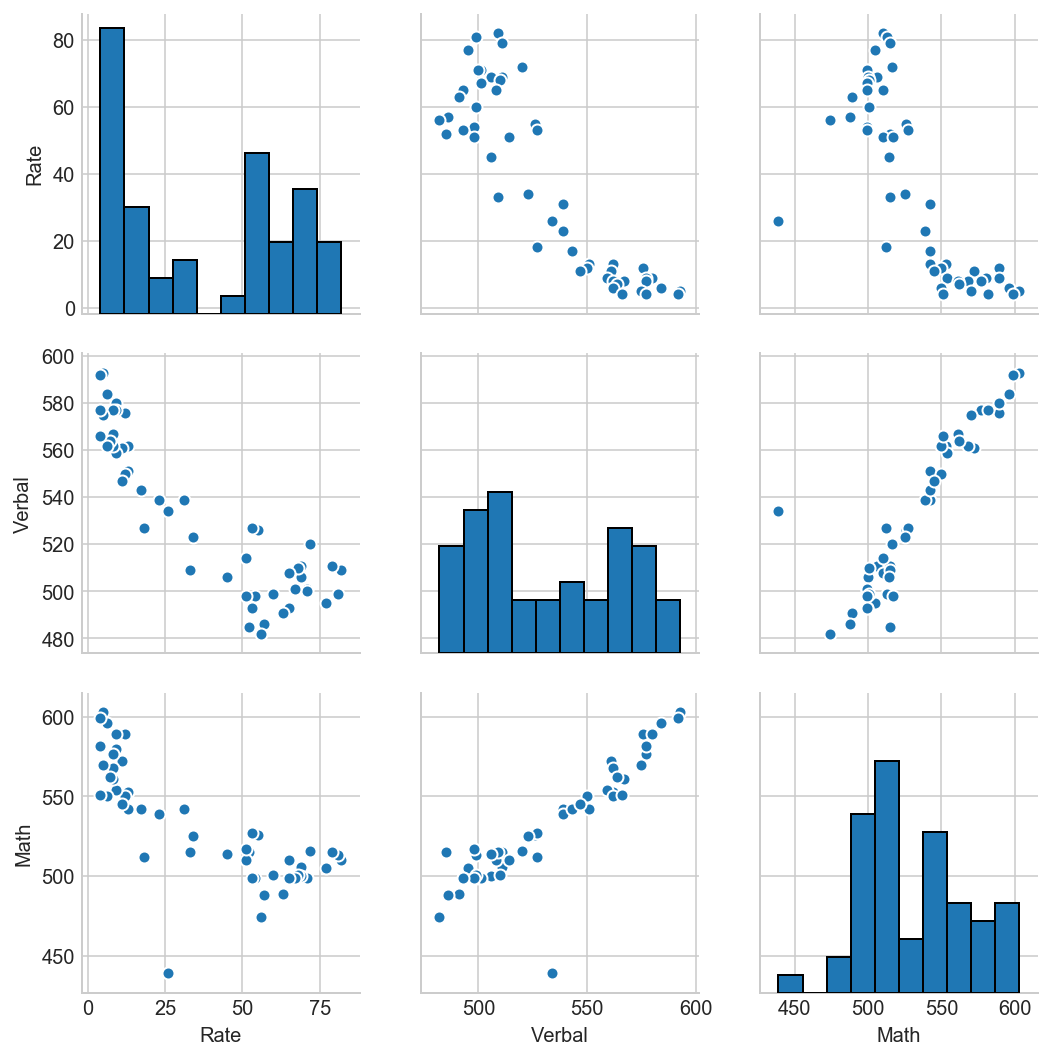

In [101]:
sns.pairplot(satfile)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

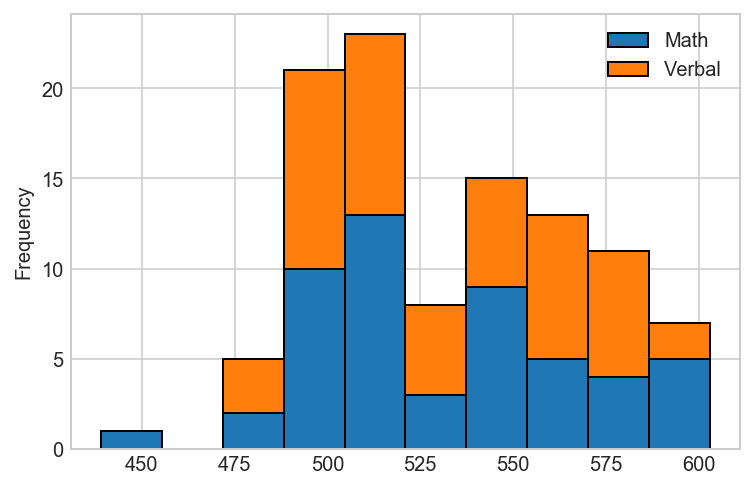

In [102]:
pd.DataFrame({'Verbal': satfile['Verbal'],'Math': satfile['Math']}).plot.hist(stacked = True)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

## Answer : A histogram is preferred for extreme cases of variance to depict either little or extreme variance in the data. On the otherhand boxplot is very good at depicting moderate variance in data in comparison to histograms and scatterplots.

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

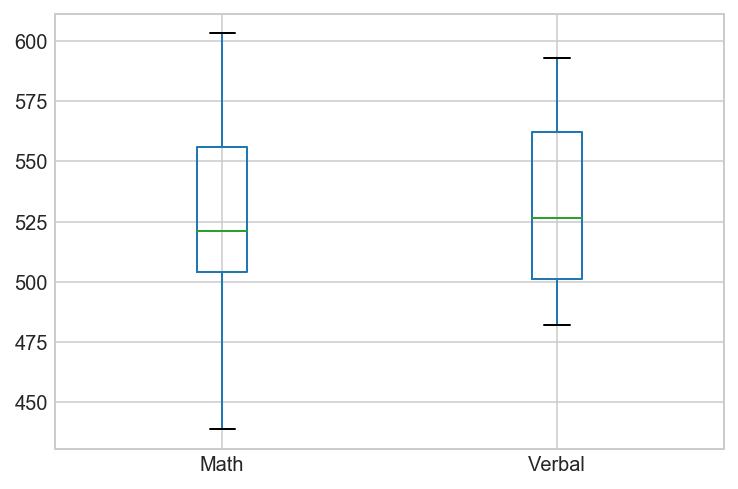

In [103]:
pd.DataFrame({'Verbal': satfile['Verbal'],'Math': satfile['Math']}).plot.box()

### Rate is not the same scale as Math and verbal so the plot will appear distorted

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [104]:
sat_nostate = satfile.drop('State',axis = 1)

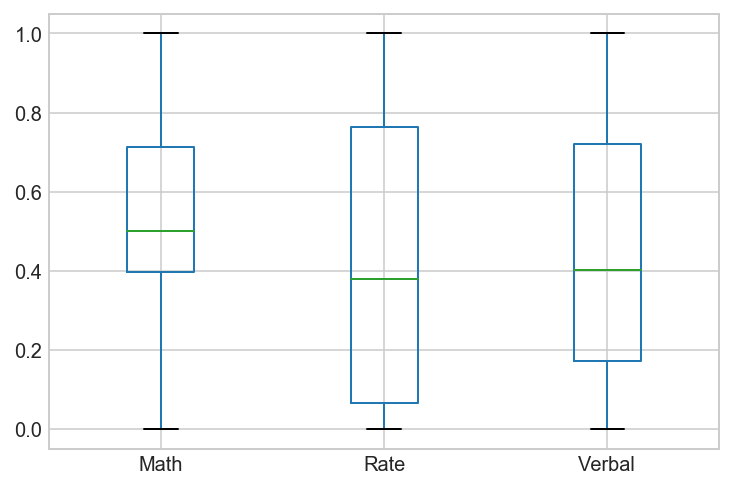

In [105]:
verbal = (sat_nostate['Verbal']-sat_nostate['Verbal'].min())/(sat_nostate['Verbal'].max()-sat_nostate['Verbal'].min())
math = (sat_nostate['Math']-sat_nostate['Math'].min())/(sat_nostate['Math'].max()-sat_nostate['Math'].min())
rate = (sat_nostate['Rate']-sat_nostate['Rate'].min())/(sat_nostate['Rate'].max()-sat_nostate['Rate'].min())
alt_sat = pd.DataFrame({'Rate': rate, 'Verbal':verbal, 'Math':math})
alt_sat.plot.box()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [106]:
list = []
for i in satfile.index:
    if satfile.loc[i ,'Verbal'] > satfile['Verbal'].mean():
        list. append(satfile.loc[i,'State'])
print 'The States with above average Verbal scores are' + str(list)

The States with above average Verbal scores are['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [107]:
alist = []
for i in satfile.index:
    if satfile.loc[i ,'Verbal'] > satfile['Verbal'].median():
        alist. append(satfile.loc[i,'State'])
print 'The States with above average Verbal scores are' + str(alist)

The States with above average Verbal scores are['WA', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']


In [108]:
for i in alist:
    if i not in list:
        print i + ' has a greater Verbal score than median but less than the mean'

WA has a greater Verbal score than median but less than the mean
WV has a greater Verbal score than median but less than the mean


In [109]:
"""xyz = satfile.loc[satfile['Verbal'] > satfile['Verbal'].mean(),'State']
abc = satfile['State'][satfile['Verbal'] > satfile['Verbal'].mean()]
print xyz
print abc """

"xyz = satfile.loc[satfile['Verbal'] > satfile['Verbal'].mean(),'State']\nabc = satfile['State'][satfile['Verbal'] > satfile['Verbal'].mean()]\nprint xyz\nprint abc "

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [110]:
Diff = pd.Series(satfile['Verbal']-satfile['Math'])
satfile['Difference'] = Diff
satfile.head()

State  Rate  Verbal  Math  Difference
0    CT    82     509   510          -1
1    NJ    81     499   513         -14
2    MA    79     511   515          -4
3    NY    77     495   505         -10
4    NH    72     520   516           4

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

### Verbal greater than Math

In [111]:
VerbMath = satfile.sort_values('Difference', ascending = False).head(10)
VerbMath.head(3)

State  Rate  Verbal  Math  Difference
27    OH    26     534   439          95
50    MS     4     566   551          15
29    WV    18     527   512          15

### Math greater than Verbal

In [112]:
MathVerb = satfile.sort_values('Difference').head(10)
MathVerb.head(3)

State  Rate  Verbal  Math  Difference
21    HI    52     485   515         -30
23    CA    51     498   517         -19
1     NJ    81     499   513         -14

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [113]:
sat_nostate.head()

Rate  Verbal  Math
0    82     509   510
1    81     499   513
2    79     511   515
3    77     495   505
4    72     520   516

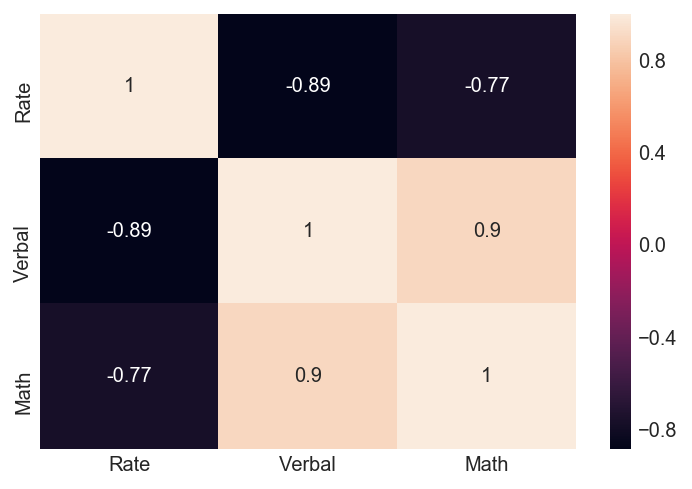

In [114]:
sns.heatmap(sat_nostate.corr(), annot = True)

#### The correlation matrix tell us that the scores are inversely related to the Rate. where as the the Math and Verbal scores are positively related to eachother. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [115]:
sat_nostate.describe()

Rate      Verbal        Math
count  52.000000   52.000000   52.000000
mean   37.153846  532.019231  531.500000
std    27.301788   33.236225   36.014975
min     4.000000  482.000000  439.000000
25%     9.000000  501.000000  504.000000
50%    33.500000  526.500000  521.000000
75%    63.500000  562.000000  555.750000
max    82.000000  593.000000  603.000000

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

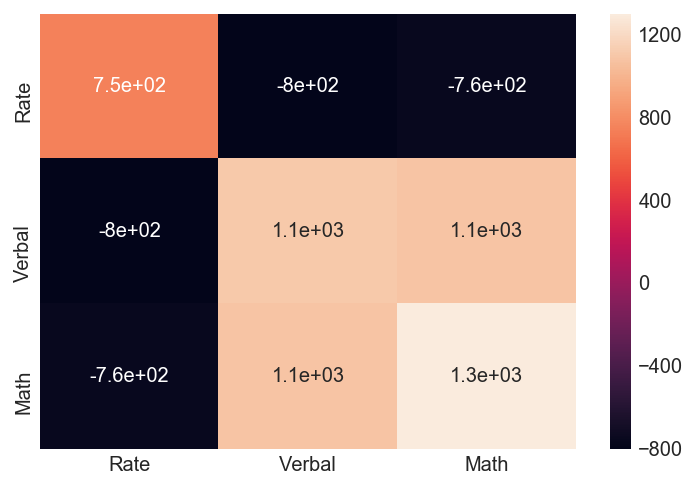

In [116]:
sns.heatmap(sat_nostate.cov(), annot = True)

### Correlation is a scaled version of the Covariance. Covariance tries to predict a linear relationship between the variables. Covariance is used when the variable is scaled similarly in contrast to correlation which is used to compare differently scaled variables. The correlation matrix standardizes the data. 

### The relation between Covariance $cov(X, Y)$ and Correlation $cor(X, Y)$ is as follows 

$$ \text{pearson correlation}\;r = cor(X, Y) =\frac{cov(X, Y)}{std(X)std(Y)}$$

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [117]:
drugdata = 'drug-use-by-age.csv'
drug = pd.read_csv(drugdata)
drugtot = pd.read_csv(drugdata)

In [118]:
def convert(string):
    try:
        string = float(string)
    except:
        string = string
    return string

In [119]:
drug.loc[:,:].replace('-',np.nan, inplace = True)
drugtot.loc[:,:].replace('-',np.nan, inplace = True)
for i in drug.columns[1:]:
    drug[i]= drug[i].map(convert)
    drugtot[i]= drug[i].map(convert)
drug.head()

age       n  alcohol-use  alcohol-frequency  marijuana-use  \
0  12  2798.0          3.9                3.0            1.1   
1  13  2757.0          8.5                6.0            3.4   
2  14  2792.0         18.1                5.0            8.7   
3  15  2956.0         29.2                6.0           14.5   
4  16  3058.0         40.1               10.0           22.5   

   marijuana-frequency  cocaine-use  cocaine-frequency  crack-use  \
0                  4.0          0.1                5.0        0.0   
1                 15.0          0.1                1.0        0.0   
2                 24.0          0.1                5.5        0.0   
3                 25.0          0.5                4.0        0.1   
4                 30.0          1.0                7.0        0.0   

   crack-frequency         ...          oxycontin-use  oxycontin-frequency  \
0              NaN         ...                    0.1                 24.5   
1              3.0         ...                    0.1                 41.0   
2              NaN         ...                    0.4                  4.5   
3              9.5         ...                    0.8                  3.0   
4              1.0         ...                    1.1                  4.0   

   tranquilizer-use  tranquilizer-frequency  stimulant-use  \
0               0.2                    52.0            0.2   
1               0.3                    25.5            0.3   
2               0.9                     5.0            0.8   
3               2.0                     4.5            1.5   
4               2.4                    11.0            1.8   

   stimulant-frequency  meth-use  meth-frequency  sedative-use  \
0                  2.0       0.0             NaN           0.2   
1                  4.0       0.1             5.0           0.1   
2                 12.0       0.1            24.0           0.2   
3                  6.0       0.3            10.5           0.4   
4                  9.5       0.3            36.0           0.2   

   sedative-frequency  
0                13.0  
1                19.0  
2                16.5  
3                30.0  
4                 3.0  

[5 rows x 28 columns]

In [120]:
druguse = []
for i in drug.columns[2::2]:
    druguse.append(i)
print druguse

['alcohol-use', 'marijuana-use', 'cocaine-use', 'crack-use', 'heroin-use', 'hallucinogen-use', 'inhalant-use', 'pain-releiver-use', 'oxycontin-use', 'tranquilizer-use', 'stimulant-use', 'meth-use', 'sedative-use']


In [121]:
drugfreq = []
for i in drug.columns[3::2]:
    drugfreq.append(i)
print drugfreq

['alcohol-frequency', 'marijuana-frequency', 'cocaine-frequency', 'crack-frequency', 'heroin-frequency', 'hallucinogen-frequency', 'inhalant-frequency', 'pain-releiver-frequency', 'oxycontin-frequency', 'tranquilizer-frequency', 'stimulant-frequency', 'meth-frequency', 'sedative-frequency']


In [122]:
drug.loc[2,'age']

'14'

In [123]:
for i in range(2,len(drug.columns),2):
    for r in drug.index:
        drugtot.iloc[r,i]=drug.iloc[r,i]*drug.iloc[r,1]/100
drugtot.head()

age       n  alcohol-use  alcohol-frequency  marijuana-use  \
0  12  2798.0      109.122                3.0         30.778   
1  13  2757.0      234.345                6.0         93.738   
2  14  2792.0      505.352                5.0        242.904   
3  15  2956.0      863.152                6.0        428.620   
4  16  3058.0     1226.258               10.0        688.050   

   marijuana-frequency  cocaine-use  cocaine-frequency  crack-use  \
0                  4.0        2.798                5.0      0.000   
1                 15.0        2.757                1.0      0.000   
2                 24.0        2.792                5.5      0.000   
3                 25.0       14.780                4.0      2.956   
4                 30.0       30.580                7.0      0.000   

   crack-frequency         ...          oxycontin-use  oxycontin-frequency  \
0              NaN         ...                  2.798                 24.5   
1              3.0         ...                  2.757                 41.0   
2              NaN         ...                 11.168                  4.5   
3              9.5         ...                 23.648                  3.0   
4              1.0         ...                 33.638                  4.0   

   tranquilizer-use  tranquilizer-frequency  stimulant-use  \
0             5.596                    52.0          5.596   
1             8.271                    25.5          8.271   
2            25.128                     5.0         22.336   
3            59.120                     4.5         44.340   
4            73.392                    11.0         55.044   

   stimulant-frequency  meth-use  meth-frequency  sedative-use  \
0                  2.0     0.000             NaN         5.596   
1                  4.0     2.757             5.0         2.757   
2                 12.0     2.792            24.0         5.584   
3                  6.0     8.868            10.5        11.824   
4                  9.5     9.174            36.0         6.116   

   sedative-frequency  
0                13.0  
1                19.0  
2                16.5  
3                30.0  
4                 3.0  

[5 rows x 28 columns]

In [124]:
drug.head()

age       n  alcohol-use  alcohol-frequency  marijuana-use  \
0  12  2798.0          3.9                3.0            1.1   
1  13  2757.0          8.5                6.0            3.4   
2  14  2792.0         18.1                5.0            8.7   
3  15  2956.0         29.2                6.0           14.5   
4  16  3058.0         40.1               10.0           22.5   

   marijuana-frequency  cocaine-use  cocaine-frequency  crack-use  \
0                  4.0          0.1                5.0        0.0   
1                 15.0          0.1                1.0        0.0   
2                 24.0          0.1                5.5        0.0   
3                 25.0          0.5                4.0        0.1   
4                 30.0          1.0                7.0        0.0   

   crack-frequency         ...          oxycontin-use  oxycontin-frequency  \
0              NaN         ...                    0.1                 24.5   
1              3.0         ...                    0.1                 41.0   
2              NaN         ...                    0.4                  4.5   
3              9.5         ...                    0.8                  3.0   
4              1.0         ...                    1.1                  4.0   

   tranquilizer-use  tranquilizer-frequency  stimulant-use  \
0               0.2                    52.0            0.2   
1               0.3                    25.5            0.3   
2               0.9                     5.0            0.8   
3               2.0                     4.5            1.5   
4               2.4                    11.0            1.8   

   stimulant-frequency  meth-use  meth-frequency  sedative-use  \
0                  2.0       0.0             NaN           0.2   
1                  4.0       0.1             5.0           0.1   
2                 12.0       0.1            24.0           0.2   
3                  6.0       0.3            10.5           0.4   
4                  9.5       0.3            36.0           0.2   

   sedative-frequency  
0                13.0  
1                19.0  
2                16.5  
3                30.0  
4                 3.0  

[5 rows x 28 columns]

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

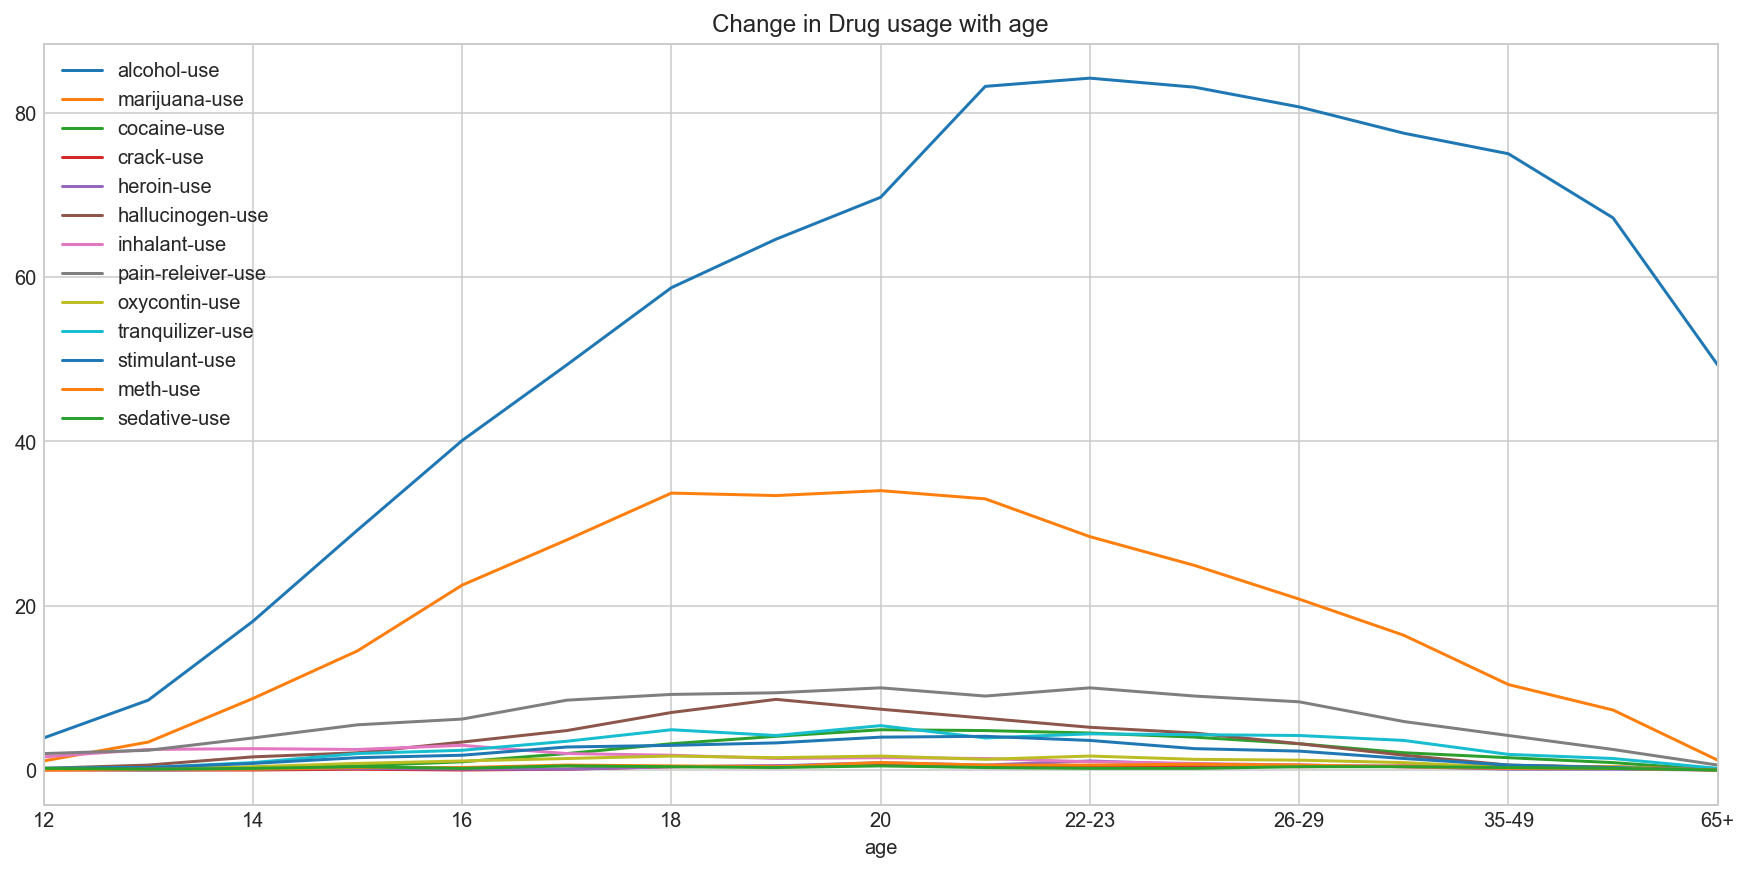

In [125]:
drug[druguse].plot(x=drug['age'],figsize=(15,7))
plt.title('Change in Drug usage with age')

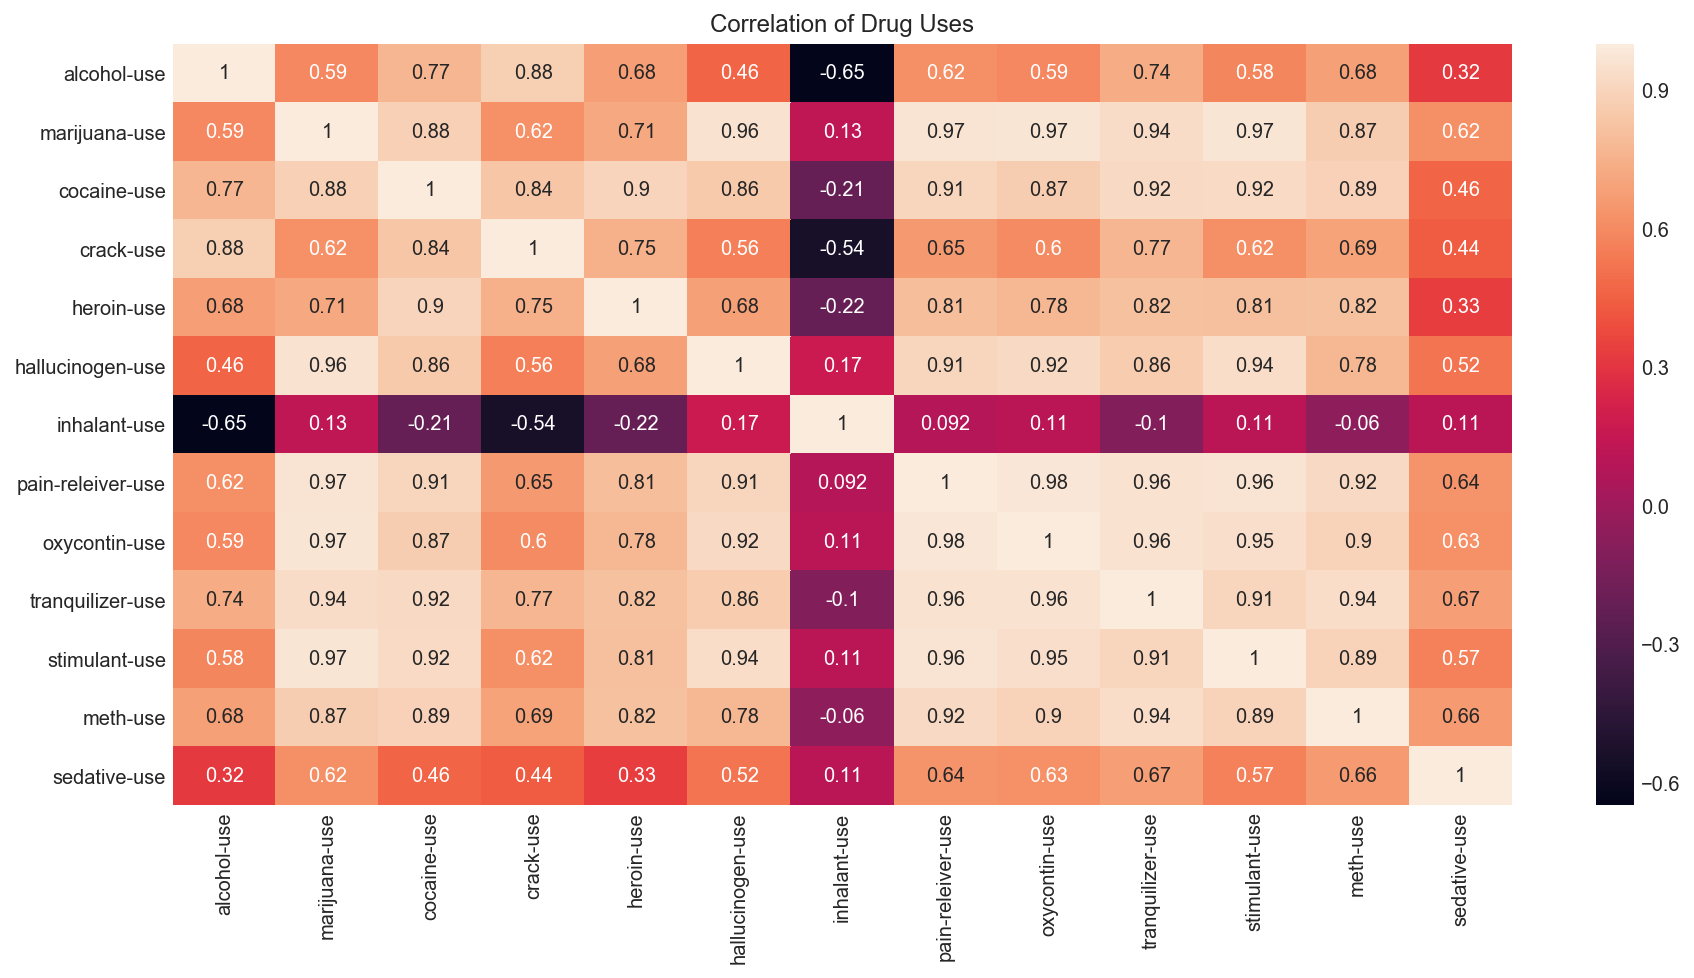

In [126]:
plt.figure(figsize=(15,7))
sns.heatmap(drug[druguse].corr(), annot= True)
plt.title('Correlation of Drug Uses')

In [127]:
drug[druguse].describe().round(2)

alcohol-use  marijuana-use  cocaine-use  crack-use  heroin-use  \
count        17.00          17.00        17.00      17.00       17.00   
mean         55.43          18.92         2.18       0.29        0.35   
std          26.88          11.96         1.82       0.24        0.33   
min           3.90           1.10         0.00       0.00        0.00   
25%          40.10           8.70         0.50       0.00        0.10   
50%          64.60          20.80         2.00       0.40        0.20   
75%          77.50          28.40         4.00       0.50        0.60   
max          84.20          34.00         4.90       0.60        1.10   

       hallucinogen-use  inhalant-use  pain-releiver-use  oxycontin-use  \
count             17.00         17.00              17.00          17.00   
mean               3.39          1.39               6.27           0.94   
std                2.79          0.93               3.17           0.61   
min                0.10          0.00               0.60           0.00   
25%                0.60          0.60               3.90           0.40   
50%                3.20          1.40               6.20           1.10   
75%                5.20          2.00               9.00           1.40   
max                8.60          3.00              10.00           1.70   

       tranquilizer-use  stimulant-use  meth-use  sedative-use  
count             17.00          17.00     17.00         17.00  
mean               2.81           1.92      0.38          0.28  
std                1.75           1.41      0.26          0.14  
min                0.20           0.00      0.00          0.00  
25%                1.40           0.60      0.20          0.20  
50%                3.50           1.80      0.40          0.30  
75%                4.20           3.00      0.60          0.40  
max                5.40           4.10      0.90          0.50

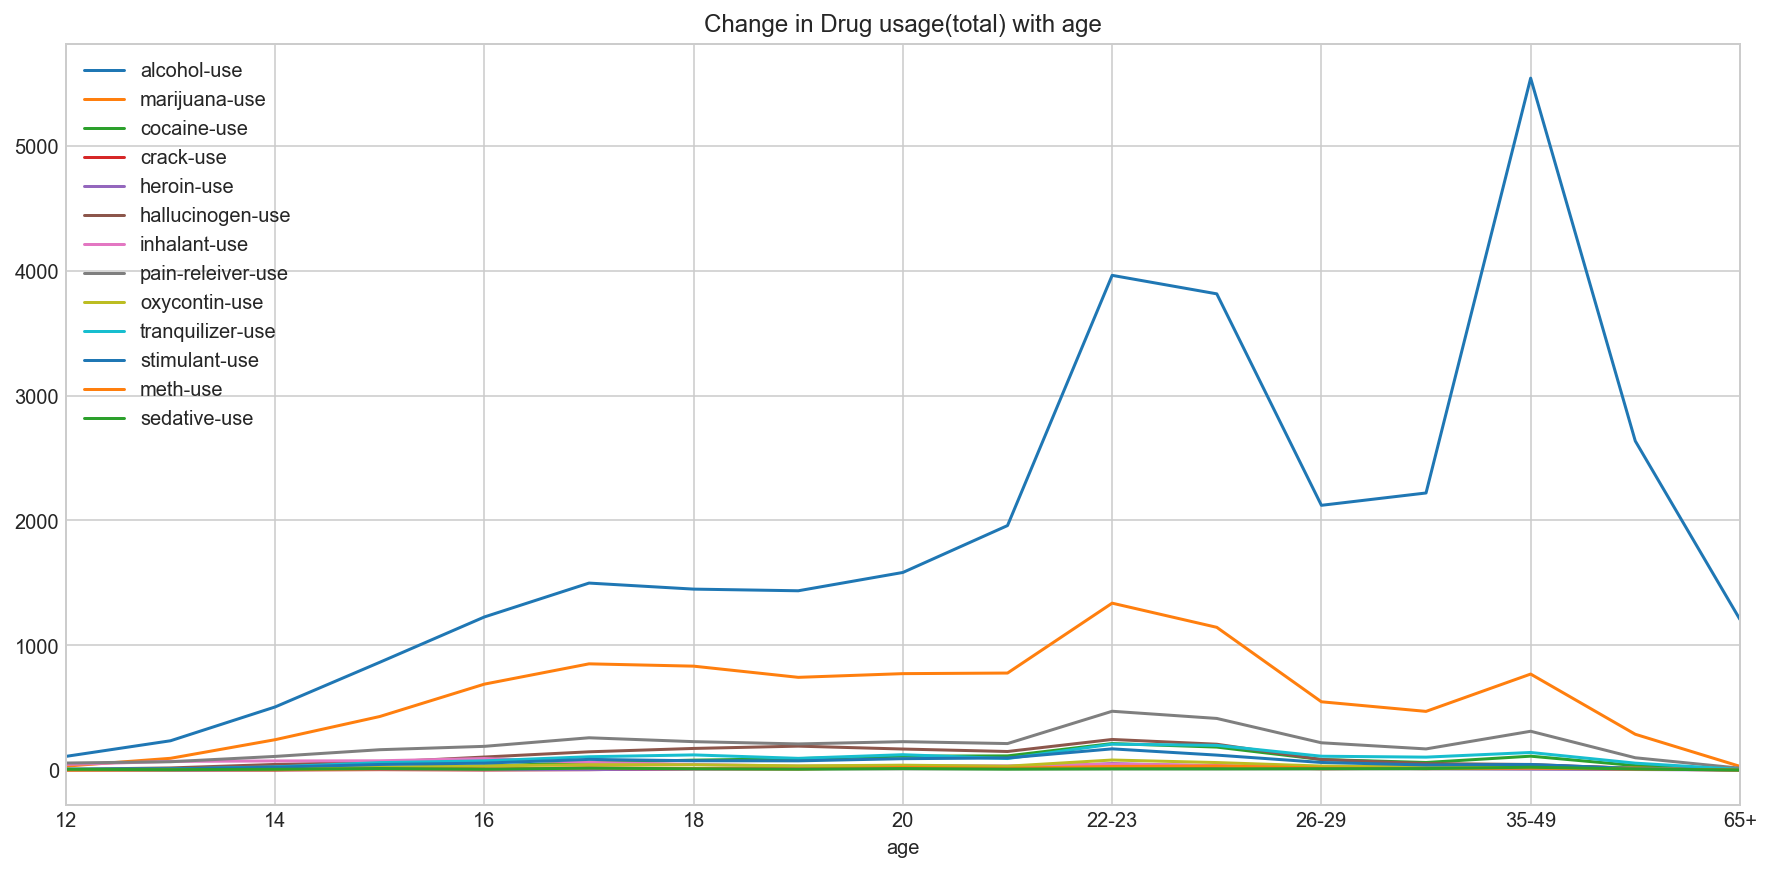

In [128]:
drugtot[druguse].plot(x=drugtot['age'],figsize=(15,7))
plt.title('Change in Drug usage(total) with age')

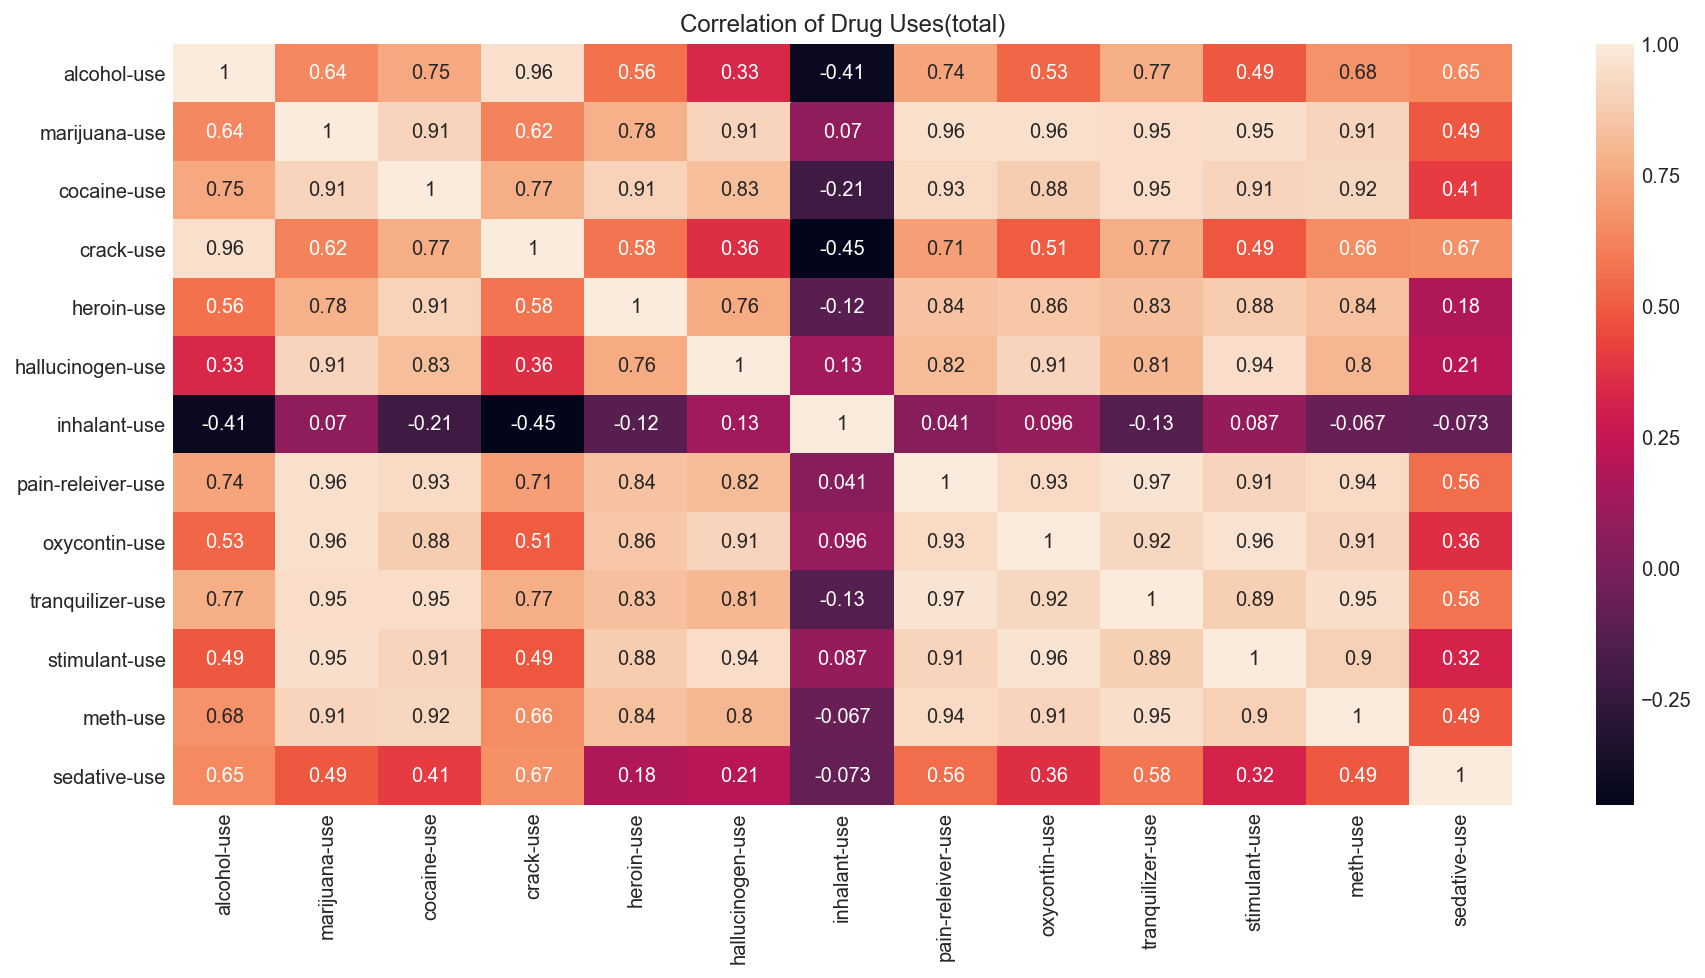

In [129]:
plt.figure(figsize=(15,7))
sns.heatmap(drugtot[druguse].corr(), annot= True)
plt.title('Correlation of Drug Uses(total)')

In [130]:
drugtot[druguse].describe().round(2)

alcohol-use  marijuana-use  cocaine-use  crack-use  heroin-use  \
count        17.00          17.00        17.00      17.00       17.00   
mean       1904.00         590.52        70.28      10.37       11.51   
std        1425.46         375.12        62.96      10.43       13.28   
min         109.12          29.38         0.00       0.00        0.00   
25%        1206.86         286.38        14.78       0.00        3.04   
50%        1497.73         688.05        60.76      10.51        7.39   
75%        2219.60         776.82       110.86      14.32       14.12   
max        5543.25        1336.79       211.82      36.96       51.78   

       hallucinogen-use  inhalant-use  pain-releiver-use  oxycontin-use  \
count             17.00         17.00              17.00          17.00   
mean             100.27         40.96             200.63          29.17   
std               78.42         25.93             120.02          20.67   
min                2.45          0.00              14.69           0.00   
25%               44.35         22.17             108.89          15.69   
50%               84.10         36.73             208.96          30.60   
75%              168.05         60.76             227.15          38.61   
max              244.76         91.74             470.70          80.02   

       tranquilizer-use  stimulant-use  meth-use  sedative-use  
count             17.00          17.00     17.00         17.00  
mean              89.70          58.88     12.23          8.98  
std               60.42          45.18      9.04          4.98  
min                4.90           0.00      0.00          0.00  
25%               54.92          22.34      7.85          6.12  
50%               93.37          55.04     11.46          9.18  
75%              120.98          85.06     15.77         11.36  
max              207.11         169.45     32.14         22.17

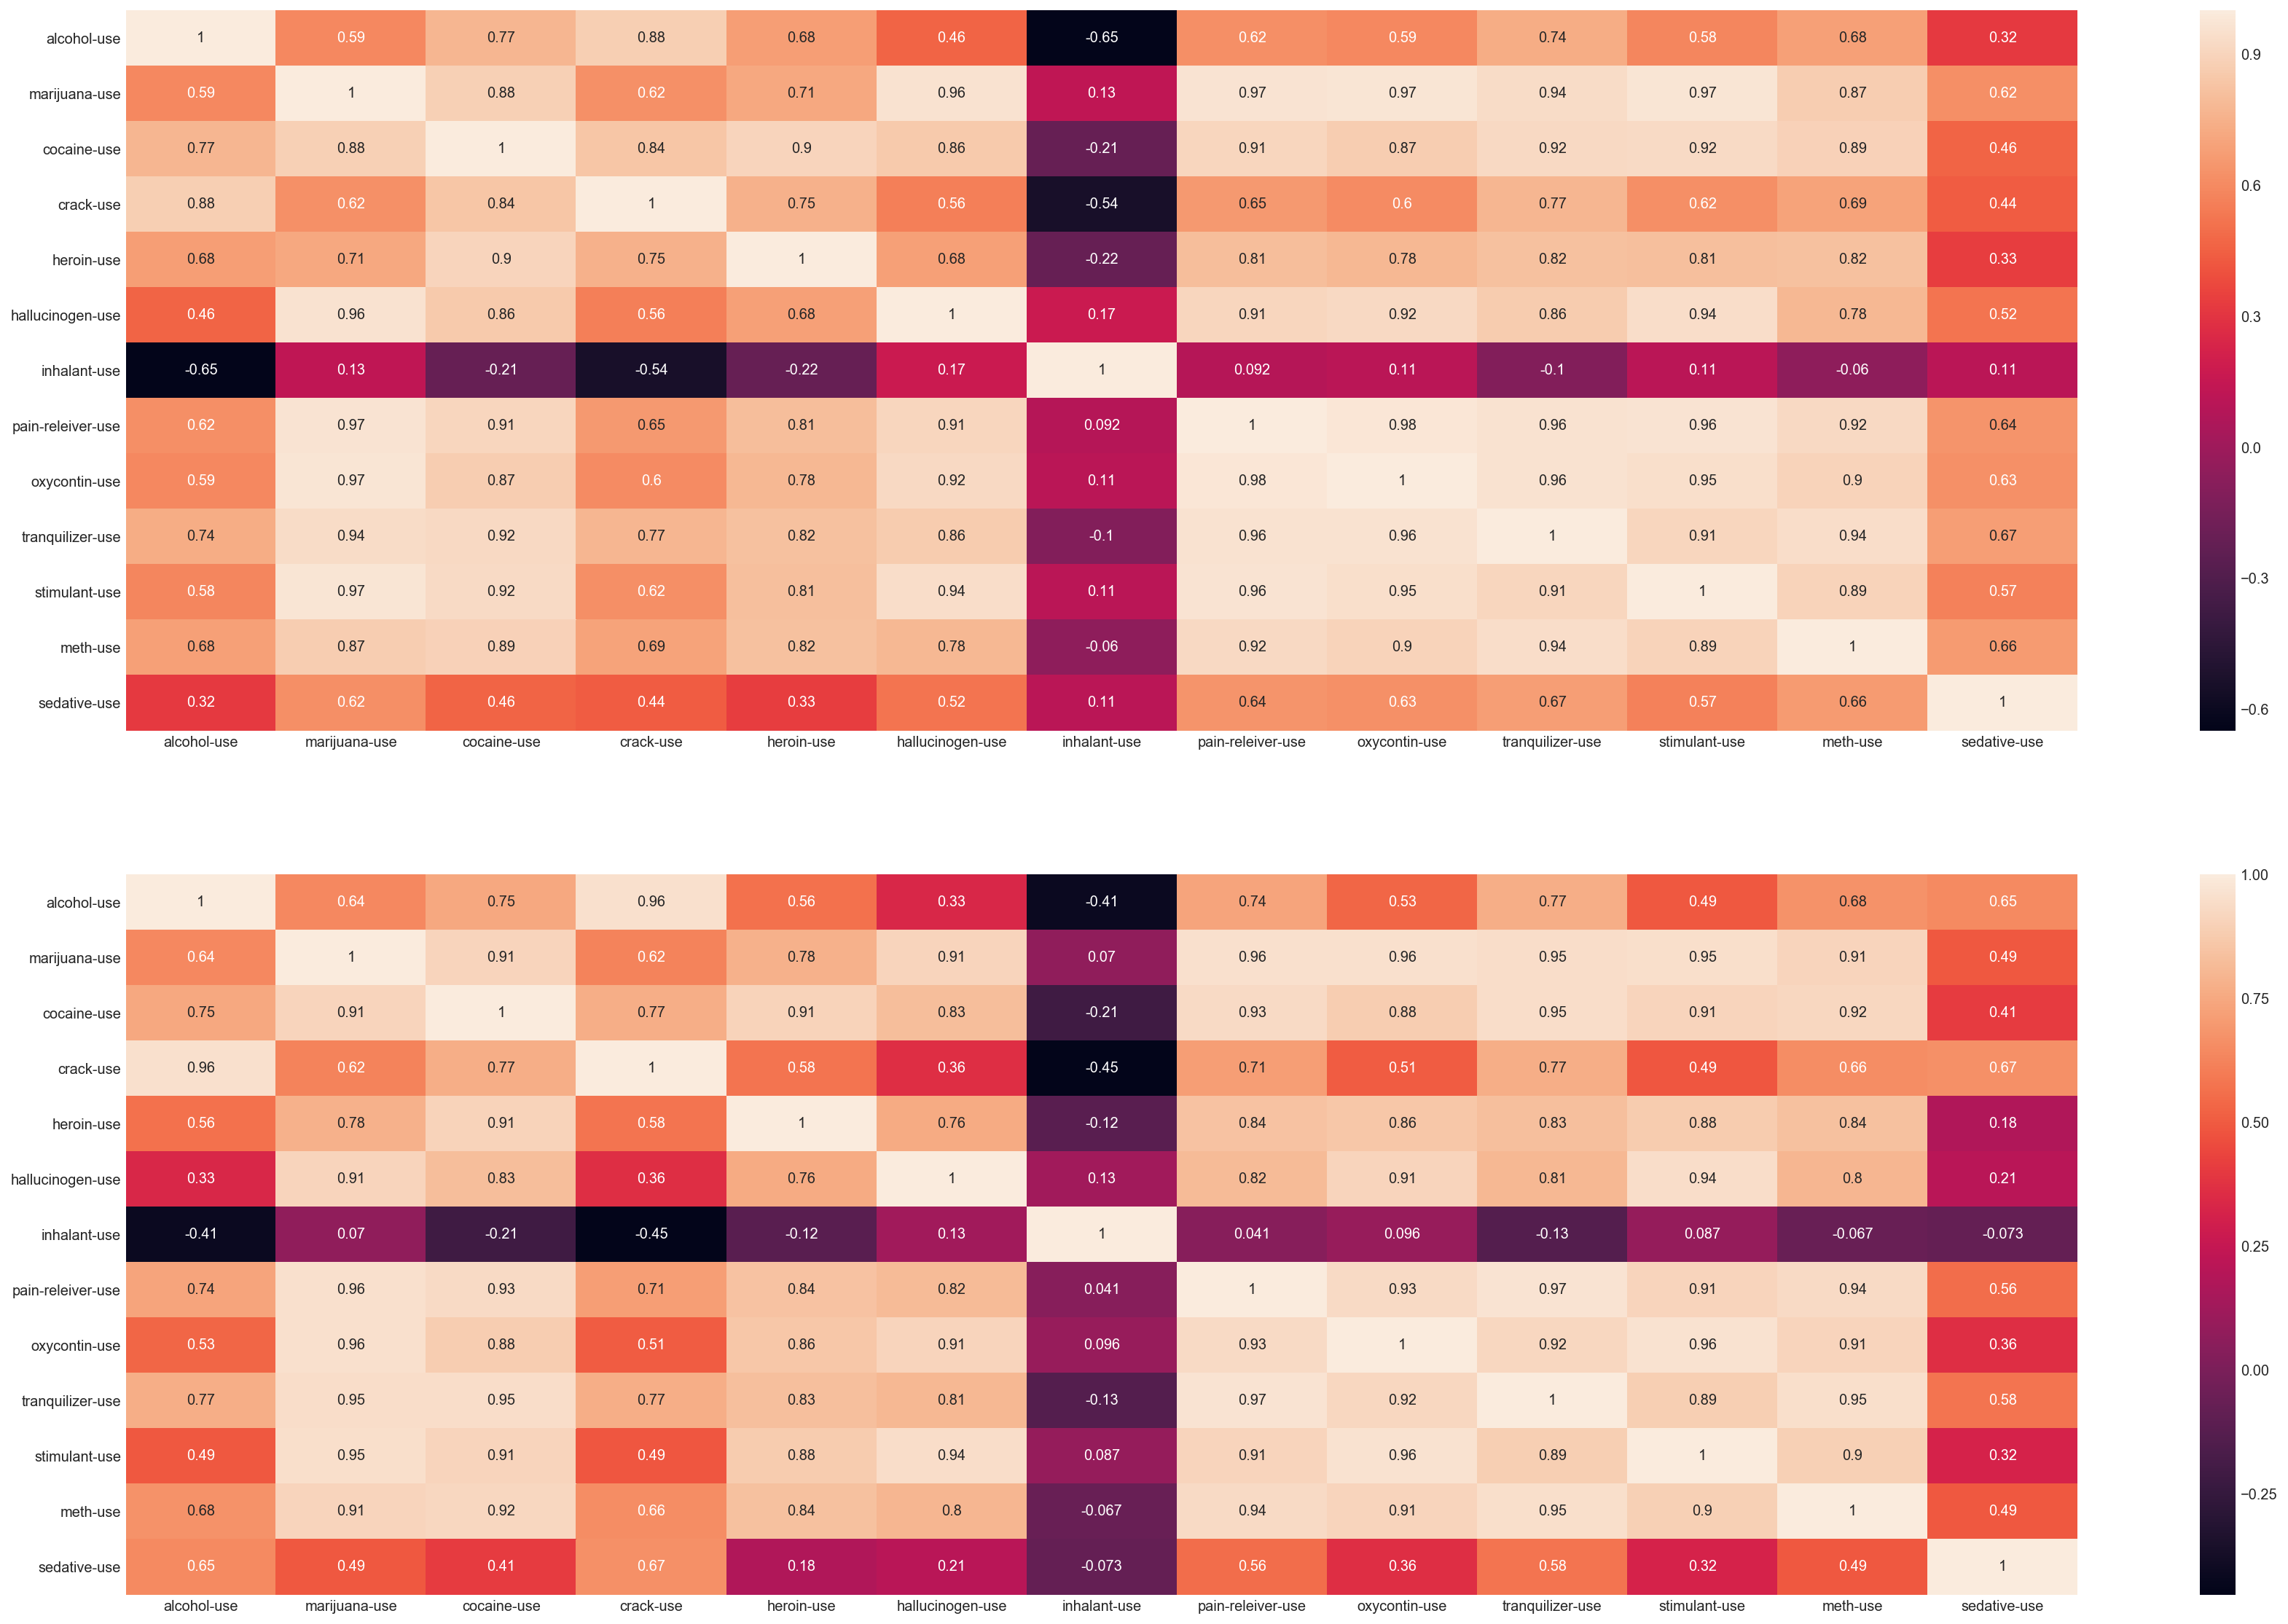

In [131]:
f,(ax1,ax2) = plt.subplots(2,1, figsize= (30,20))

sns.heatmap(drug[druguse].corr(), annot= True, ax = ax1)

sns.heatmap(drugtot[druguse].corr(), annot= True, ax = ax2)



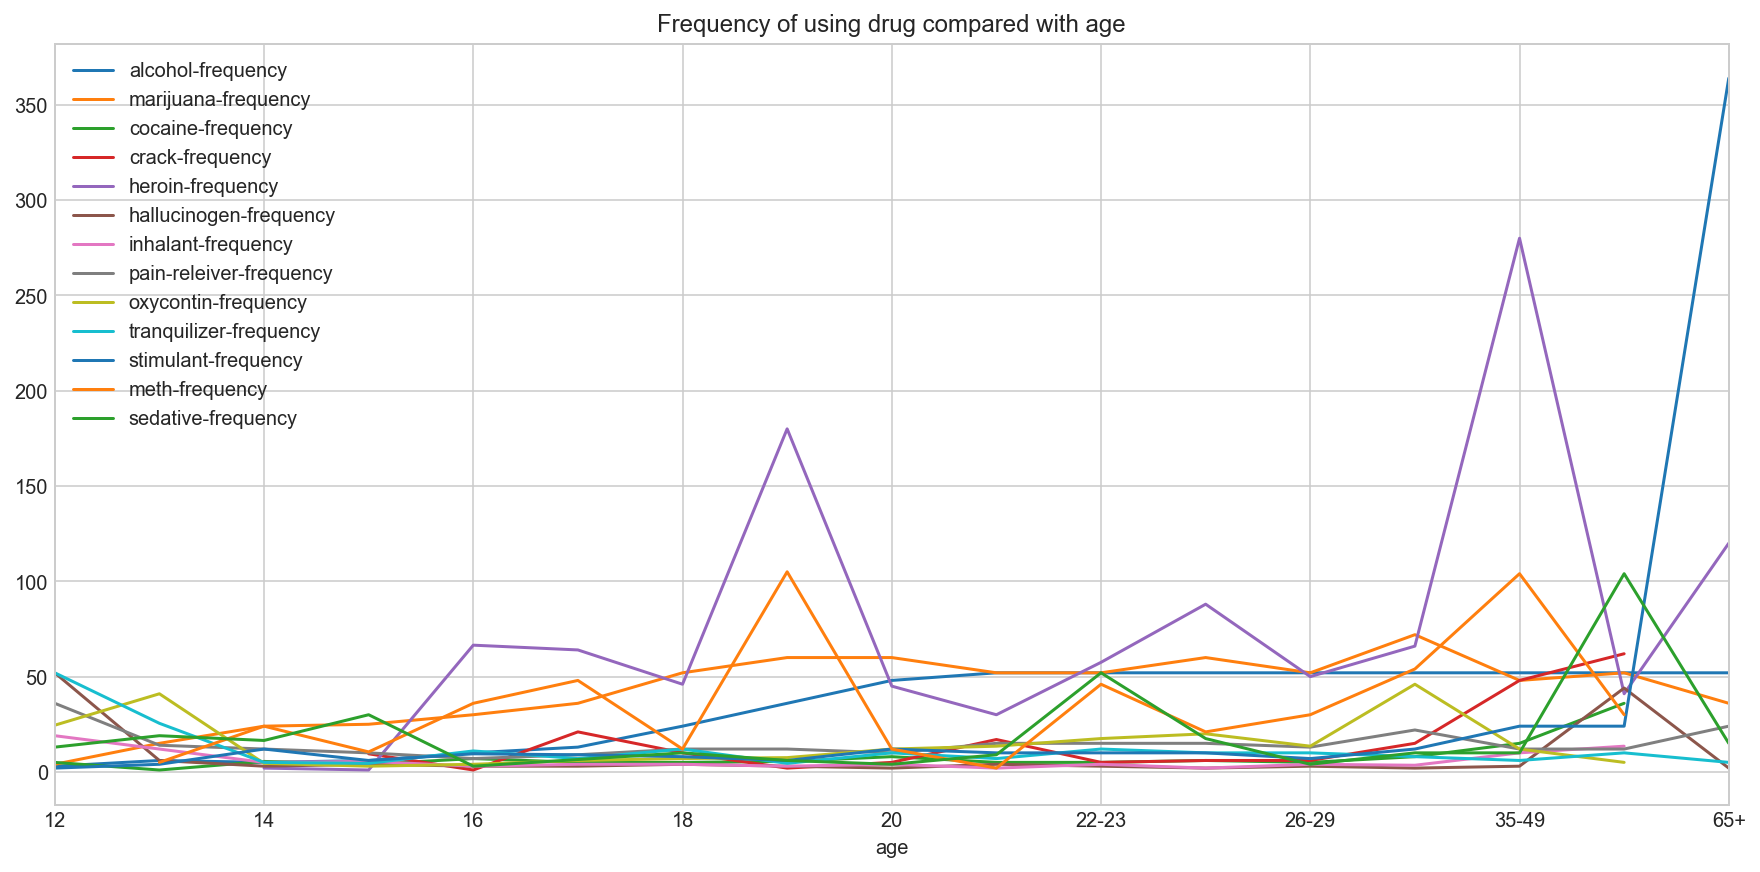

In [132]:
drug[drugfreq].plot(x = drug['age'],figsize=(15,7))
plt.title('Frequency of using drug compared with age')

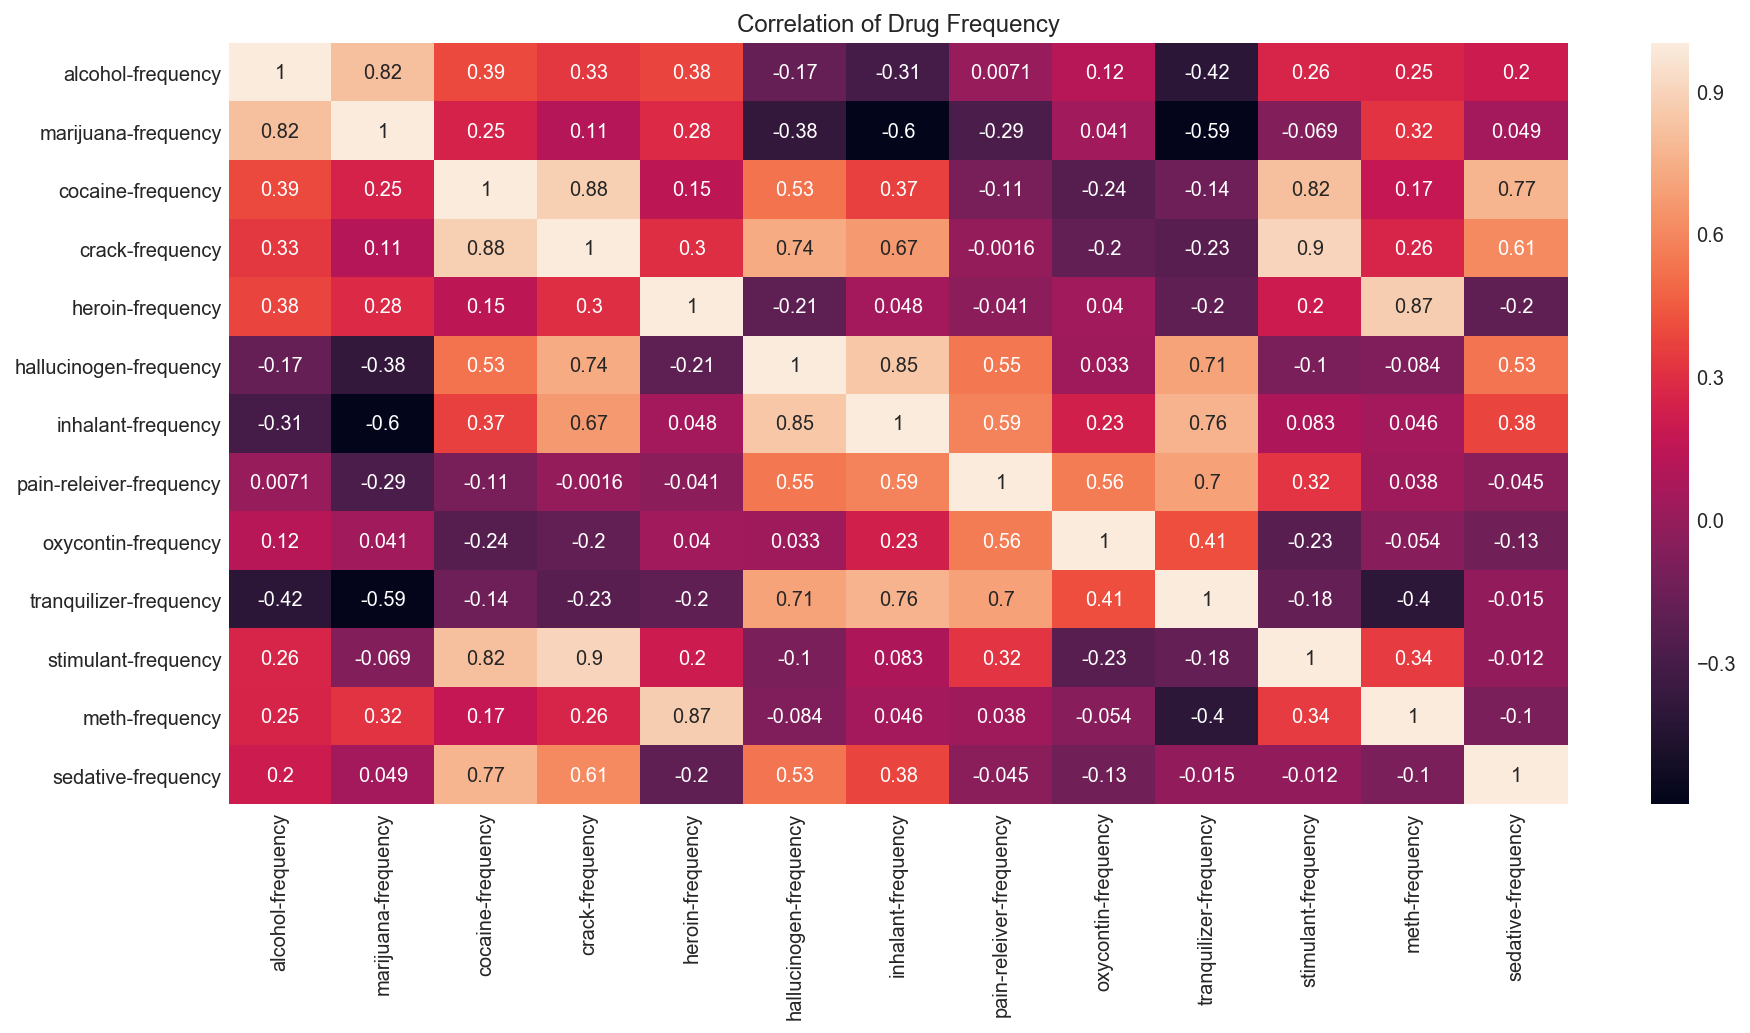

In [133]:
plt.figure(figsize=(15,7))
sns.heatmap(drug[drugfreq].corr(), annot= True)
plt.title('Correlation of Drug Frequency')

In [134]:
frequency = drug[drugfreq].describe().round(2)
frequency

alcohol-frequency  marijuana-frequency  cocaine-frequency  \
count              17.00                17.00              16.00   
mean               33.35                42.94               7.88   
std                21.32                18.36               8.04   
min                 3.00                 4.00               1.00   
25%                10.00                30.00               5.00   
50%                48.00                52.00               5.25   
75%                52.00                52.00               7.25   
max                52.00                72.00              36.00   

       crack-frequency  heroin-frequency  hallucinogen-frequency  \
count            14.00             16.00                   17.00   
mean             15.04             73.28                    8.41   
std              18.11             70.09                   15.00   
min               1.00              1.00                    2.00   
25%               5.00             39.62                    3.00   
50%               7.75             53.75                    3.00   
75%              16.50             71.88                    4.00   
max              62.00            280.00                   52.00   

       inhalant-frequency  pain-releiver-frequency  oxycontin-frequency  \
count               16.00                    17.00                16.00   
mean                 6.16                    14.71                14.81   
std                  4.86                     6.94                12.80   
min                  2.00                     7.00                 3.00   
25%                  3.38                    12.00                 5.75   
50%                  4.00                    12.00                12.00   
75%                  6.62                    15.00                18.12   
max                 19.00                    36.00                46.00   

       tranquilizer-frequency  stimulant-frequency  meth-frequency  \
count                   17.00                17.00           15.00   
mean                    11.74                31.15           35.97   
std                     11.49                85.97           31.97   
min                      4.50                 2.00            2.00   
25%                      6.00                 7.00           12.00   
50%                     10.00                10.00           30.00   
75%                     11.00                12.00           47.00   
max                     52.00               364.00          105.00   

       sedative-frequency  
count               17.00  
mean                19.38  
std                 24.83  
min                  3.00  
25%                  6.50  
50%                 10.00  
75%                 17.50  
max                104.00

In [135]:
blank = []
for i in drugtot[druguse]:
    blank.append(drugtot[i].sum())

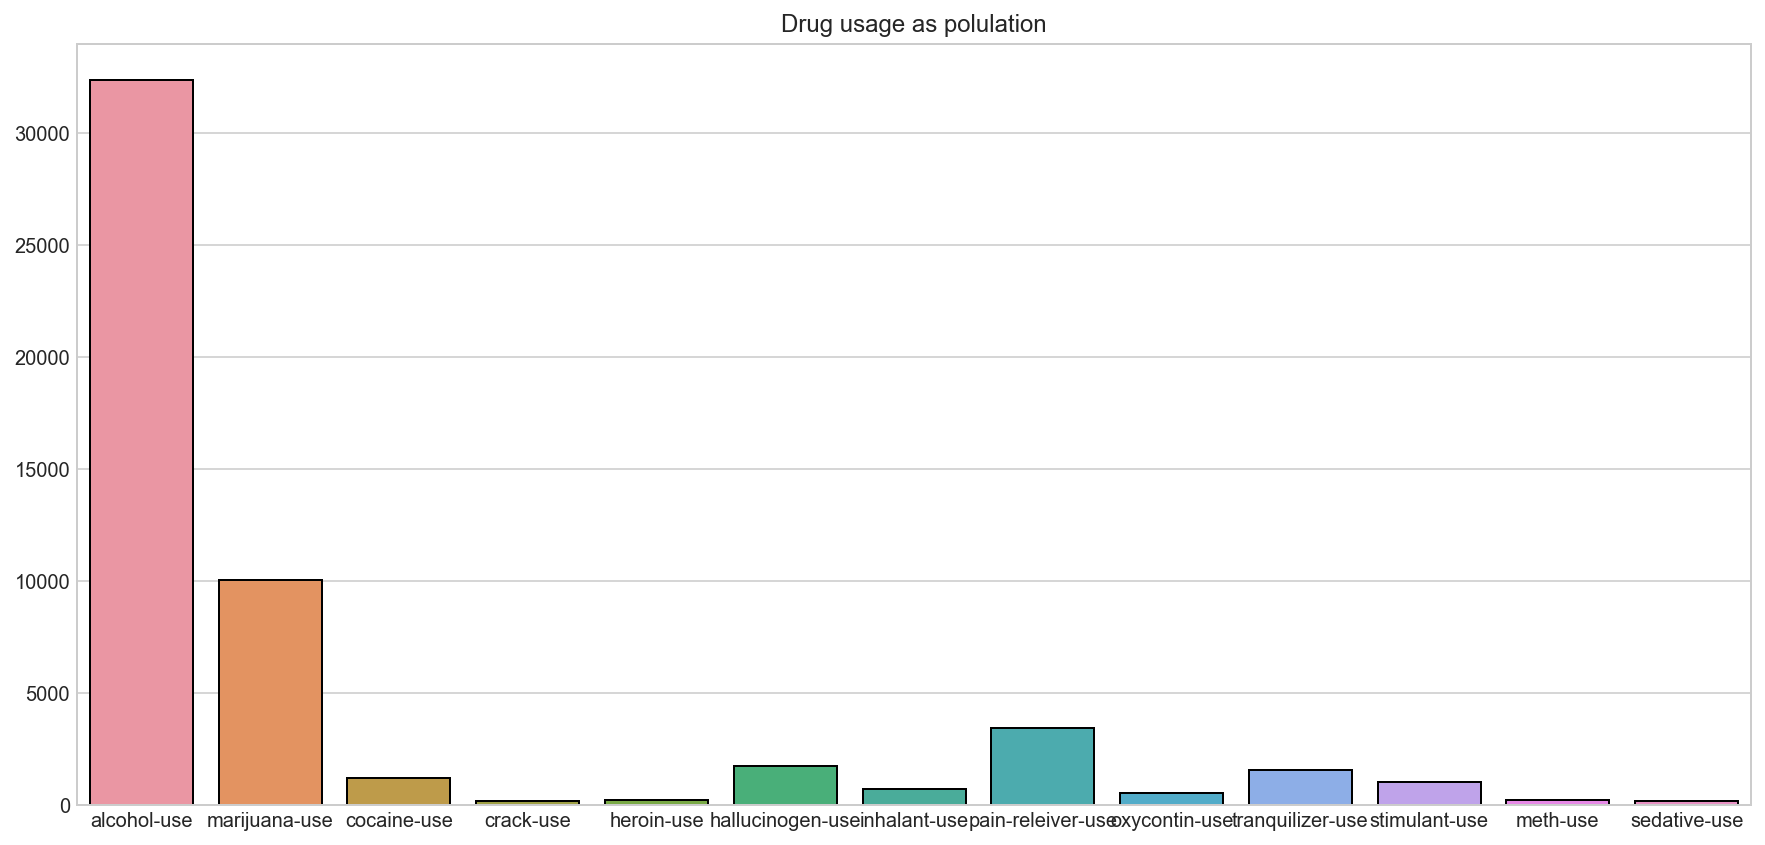

In [136]:
plt.figure(figsize=(15,7))
sns.barplot(x = druguse, y = blank)
plt.title('Drug usage as polulation')

In [137]:
blank2 = []
for i in drugfreq:
    blank2.append(frequency.loc['mean',i])

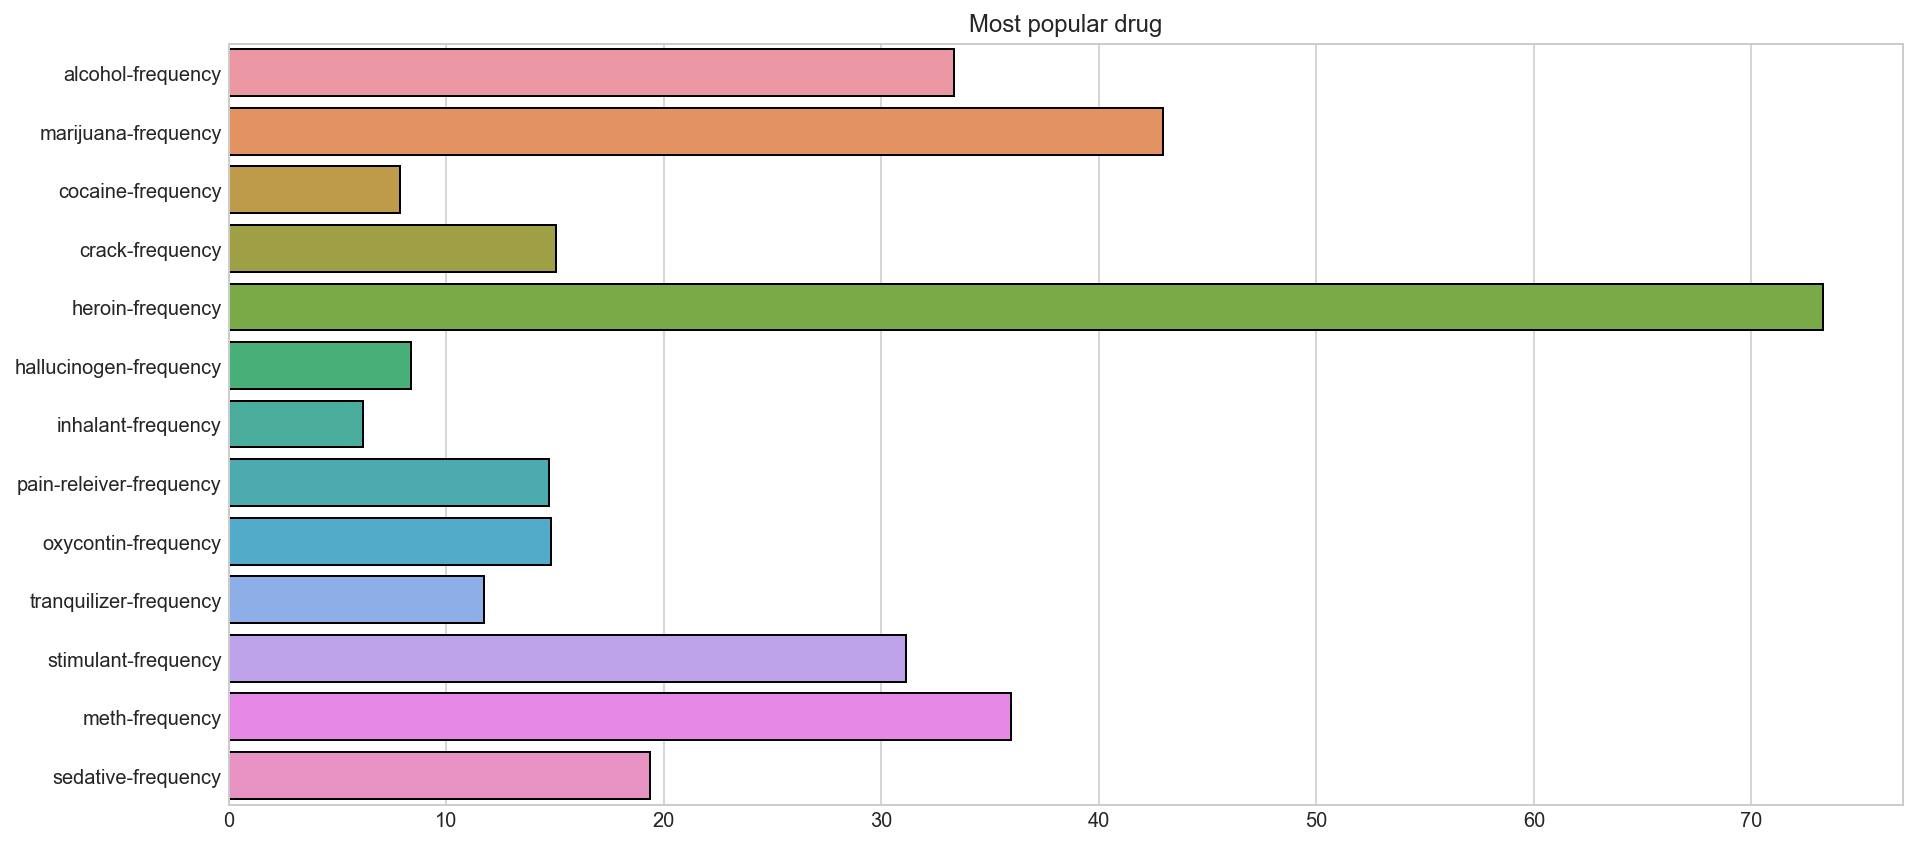

In [138]:
plt.figure(figsize=(15,7))
sns.barplot(y = drugfreq, x = blank2)
plt.title('Most popular drug')

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [139]:
# Code
print druguse

['alcohol-use', 'marijuana-use', 'cocaine-use', 'crack-use', 'heroin-use', 'hallucinogen-use', 'inhalant-use', 'pain-releiver-use', 'oxycontin-use', 'tranquilizer-use', 'stimulant-use', 'meth-use', 'sedative-use']


In [140]:
import copy
drugnew = copy.copy(druguse)
drugnew.remove('inhalant-use')

In [141]:
drug[drugnew].head()

alcohol-use  marijuana-use  cocaine-use  crack-use  heroin-use  \
0          3.9            1.1          0.1        0.0         0.1   
1          8.5            3.4          0.1        0.0         0.0   
2         18.1            8.7          0.1        0.0         0.1   
3         29.2           14.5          0.5        0.1         0.2   
4         40.1           22.5          1.0        0.0         0.1   

   hallucinogen-use  pain-releiver-use  oxycontin-use  tranquilizer-use  \
0               0.2                2.0            0.1               0.2   
1               0.6                2.4            0.1               0.3   
2               1.6                3.9            0.4               0.9   
3               2.1                5.5            0.8               2.0   
4               3.4                6.2            1.1               2.4   

   stimulant-use  meth-use  sedative-use  
0            0.2       0.0           0.2  
1            0.3       0.1           0.1  
2            0.8       0.1           0.2  
3            1.5       0.3           0.4  
4            1.8       0.3           0.2

In [142]:
len(drug[drugnew].columns)

12

In [143]:
tot_noi = []
for r in drug[drugnew].index:
    temp = 0
    for i in range(len(drug[drugnew].columns)):
        temp = temp + drug[drugnew].iloc[r,i]
    tot_noi.append(temp/12)      
        


In [144]:
stats.ttest_ind(tot_noi ,drug['inhalant-use'] )

Ttest_indResult(statistic=6.7102640606802444, pvalue=1.4123401978122179e-07)

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [145]:
sat_vm = sat_nostate.drop('Rate',axis = 1)

In [146]:
sat_vm.corr(method='spearman')

Verbal      Math
Verbal  1.000000  0.905205
Math    0.905205  1.000000

### Spearman correlation assesses how well the relationship between two variables can be described using a monotonic function. Pearson's correlation assesses linear relationships, Spearman's correlation assesses monotonic relationships (whether linear or not). A high spearman correlation signifies that there exists a similar correlation where as a low value indicates a dissimilar relation

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [147]:
sat_nostate.corr(method ='spearman')

Rate    Verbal      Math
Rate    1.000000 -0.833294 -0.813275
Verbal -0.833294  1.000000  0.905205
Math   -0.813275  0.905205  1.000000

In [148]:
satfile['Ranking'] = [stats.percentileofscore(satfile['Rate'], a, 'rank') for a in satfile['Rate']]

In [151]:
satfile.head(53)

State  Rate  Verbal  Math  Difference     Ranking
0     CT    82     509   510          -1  100.000000
1     NJ    81     499   513         -14   98.076923
2     MA    79     511   515          -4   96.153846
3     NY    77     495   505         -10   94.230769
4     NH    72     520   516           4   92.307692
5     RI    71     501   499           2   89.423077
6     PA    71     500   499           1   89.423077
7     VT    69     511   506           5   85.576923
8     ME    69     506   500           6   85.576923
9     VA    68     510   501           9   82.692308
10    DE    67     501   499           2   80.769231
11    MD    65     508   510          -2   77.884615
12    NC    65     493   499          -6   77.884615
13    GA    63     491   489           2   75.000000
14    IN    60     499   501          -2   73.076923
15    SC    57     486   488          -2   71.153846
16    DC    56     482   474           8   69.230769
17    OR    55     526   526           0   67.307692
18    FL    54     498   499          -1   65.384615
19    WA    53     527   527           0   62.500000
20    TX    53     493   499          -6   62.500000
21    HI    52     485   515         -30   59.615385
22    AK    51     514   510           4   56.730769
23    CA    51     498   517         -19   56.730769
24    AZ    34     523   525          -2   51.923077
25    NV    33     509   515          -6   50.000000
26    CO    31     539   542          -3   48.076923
27    OH    26     534   439          95   46.153846
28    MT    23     539   539           0   44.230769
29    WV    18     527   512          15   42.307692
30    ID    17     543   542           1   40.384615
31    TN    13     562   553           9   37.500000
32    NM    13     551   542           9   37.500000
33    IL    12     576   589         -13   33.653846
34    KY    12     550   550           0   33.653846
35    WY    11     547   545           2   29.807692
36    MI    11     561   572         -11   29.807692
37    MN     9     580   589          -9   25.000000
38    KS     9     577   580          -3   25.000000
39    AL     9     559   554           5   25.000000
40    NE     8     562   568          -6   19.230769
41    OK     8     567   561           6   19.230769
42    MO     8     577   577           0   19.230769
43    LA     7     564   562           2   15.384615
44    WI     6     584   596         -12   12.500000
45    AR     6     562   550          12   12.500000
46    UT     5     575   570           5    8.653846
47    IA     5     593   603         -10    8.653846
48    SD     4     577   582          -5    3.846154
49    ND     4     592   599          -7    3.846154
50    MS     4     566   551          15    3.846154
51   All    45     506   514          -8   53.846154

In [154]:
satfile.loc[satfile['State'] == 'CA']

State  Rate  Verbal  Math  Difference    Ranking
23    CA    51     498   517         -19  56.730769

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.